In [19]:
import json
import collections
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil
import datetime
import numpy as np

In [88]:
timeslots = [datetime.datetime(2015,11,19,17,0,0), datetime.datetime(2015,11,19,19,0,0), datetime.datetime(2015,11,19,21,0,0), datetime.datetime(2015,11,19,23,0,0), datetime.datetime(2015,11,20,11,0,0),datetime.datetime(2015,11,20,15,0,0), datetime.datetime(2015,11,20,17,0,0), datetime.datetime(2015,11,20,19,0,0)]

In [89]:
def get_time_id(ts):
    index = 0
    for t in timeslots:
        if ts <= t:
            return index
        index += 1
    return -1

In [90]:
with open('output.json') as data_file:
    data = json.load(data_file)["colors"]

colors = collections.OrderedDict()
valence = collections.OrderedDict()
for record in data:
    uid = record["uid"]
    ts = dateutil.parser.parse(record["time"])
    t = get_time_id(ts)
    if uid not in colors.keys():
        colors[uid] = collections.OrderedDict()
    if uid not in valence.keys():
        valence[uid] = collections.OrderedDict()
    colors[uid][t] = record["color"]
    valence[uid][t] = record["valence"]

In [99]:
print valence.keys()

[1, 2, 5, 6, 19, 20, 7, 8, 3, 4, 18, 17, 9, 10, 16, 15, 11, 12, 13]


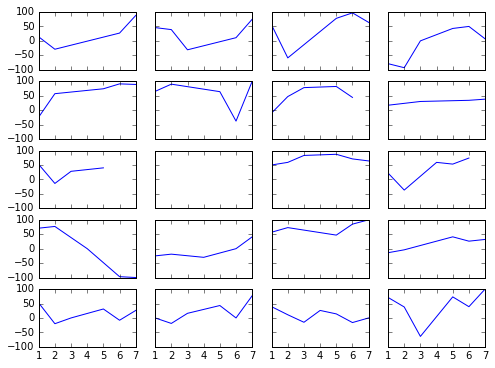

In [103]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
f, axarr = plt.subplots(5,4, sharex=True, sharey=True)
for k in valence:
    val = valence[k]
    x=list(val.keys())
    y=list(val.values())
    axarr[k/4 - 1][k%4 - 1].plot(x,y)
plt.show()